In [1]:
import polars as pl
import pyarrow.dataset as ds
from pyarrow import fs
import pandas as pd
from datetime import date, timedelta

from darts import TimeSeries
from darts.utils.missing_values import fill_missing_values
from darts.metrics import mse
from darts.models import TCNModel, CatBoostModel, NBEATSModel, NLinearModel, RNNModel, ARIMA, TFTModel

from pytorch_lightning.callbacks import Callback
import torch

from pytorch_lightning.callbacks import Callback, EarlyStopping
from optuna.integration import PyTorchLightningPruningCallback
import optuna

import json

In [5]:
terr = read_neon(
    site_id = "SJER", 
    time_col = "datetime", 
    link = terrestrial_link,
)

# phen = read_neon(
#     site_id = "WOOD", 
#     time_col = "datetime", 
#     link = phenology_link,
# )

In [28]:
# terr["variable"].unique()

In [6]:
terr_pl = pl.from_pandas(
    terr
    .pivot(index = "datetime", columns = "variable", values = "observation")
    .reset_index()
)

# phen_pl = pl.from_pandas(
#     phen
#     .pivot(index = "datetime", columns = "variable", values = "observation")
#     .reset_index()
# )

In [30]:
# terr_pl

In [9]:
# day-average data - reduce noise and dimension
terr_daily = day_mean_several(
    terr_pl, 
    ["nee", "le"], 
    time_col = "datetime", 
    avg_name_app = "day_avg",
)

# phen_daily = day_mean_several(
#     phen_pl, 
#     ["gcc_90", "rcc_90"], 
#     time_col = "datetime", 
#     avg_name_app = "day_avg",
# )

In [20]:
# fill values
terr_series_daily = fill_missing_values(
    pl_to_series(terr_daily)
)
terr_series = fill_missing_values(
    pl_to_series(terr_pl, time_col = "datetime", freq = "min")
)
# phen_series = fill_missing_values(
#     pl_to_series(phen_daily)
# )

# have dates match NOAA data
terr_pre, terr_series = terr_series.split_before(pd.Timestamp("2020-09-25"))
# phen_pre, phen_series = phen_series.split_before(pd.Timestamp("2020-09-25"))

In [33]:
# start_ts = pd.Timestamp("2023-01-01")
# end_ts = pd.Timestamp("2023-02-28")

# terr_series.slice(start_ts = start_ts, end_ts = end_ts)['nee'].plot()
# terr_series_daily.slice(start_ts = start_ts, end_ts = end_ts)['nee_day_avg'].plot()

In [34]:
# terr_series_daily.plot()

# Quick searches

#### **PUUM, Hawaii**

In [59]:
puum = quick_neon_series(
    site_id = "PUUM",
    link = terrestrial_link,
    freq = "min",
    time_col = "datetime",
    day_avg= False,
)

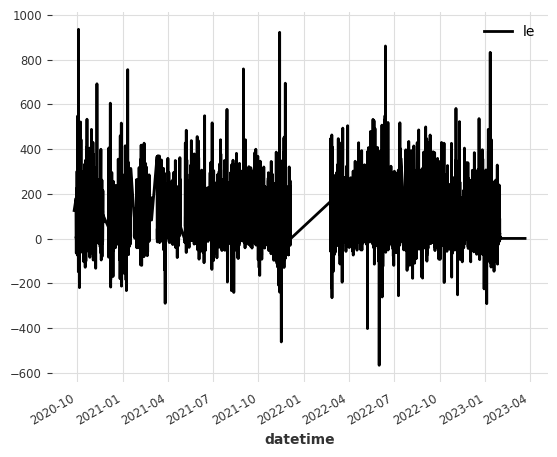

In [60]:
puum['le'].plot()

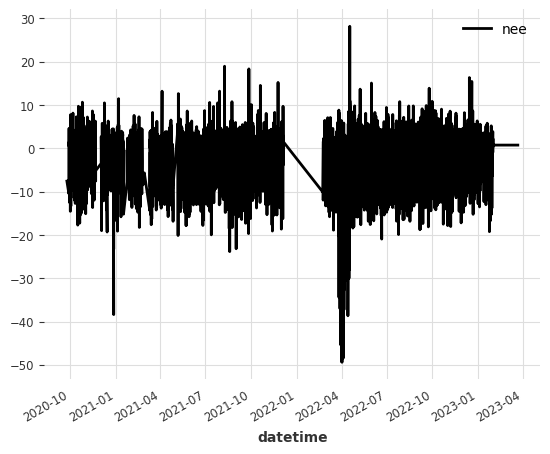

In [61]:
puum['nee'].plot()

#### **SRER, Arizona**

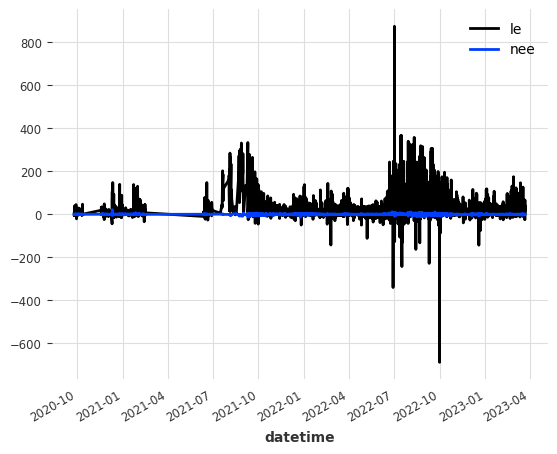

In [57]:
srer = quick_neon_series(
    site_id = "SRER",
    link = terrestrial_link,
    freq = "min",
    time_col = "datetime",
    day_avg= False,
)
# srer.plot()

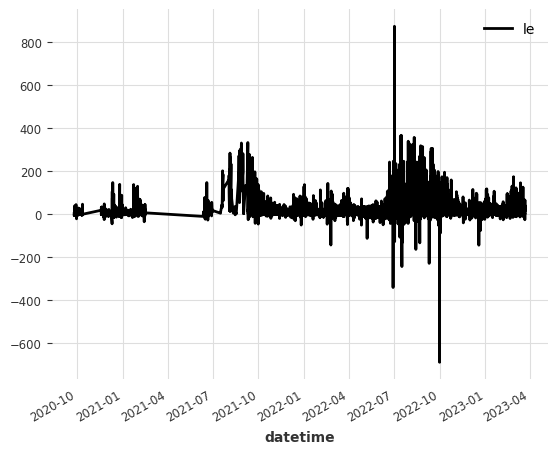

In [62]:
srer['le'].plot()

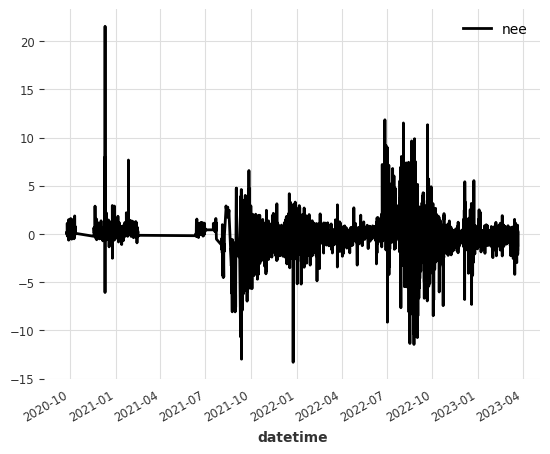

In [63]:
srer['nee'].plot()

#### **SJER, California**

In [64]:
sjer = quick_neon_series(
    site_id = "SJER",
    link = terrestrial_link,
    freq = "min",
    time_col = "datetime",
    day_avg= False,
)

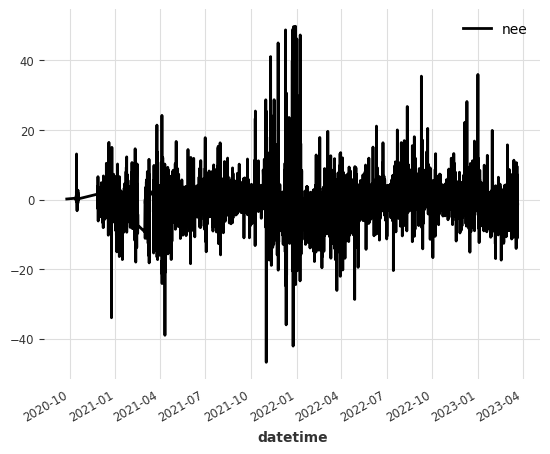

In [65]:
sjer['nee'].plot()

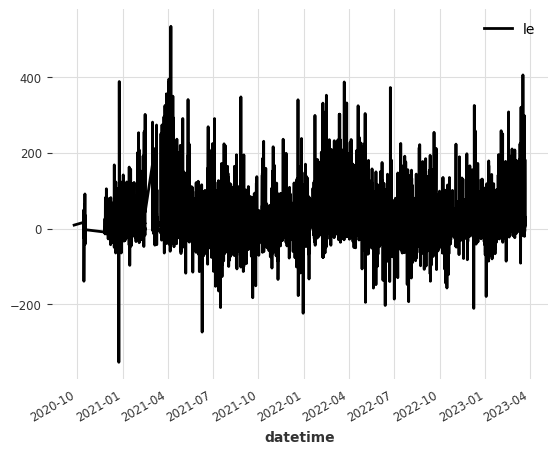

In [66]:
sjer['le'].plot()

#### **JORN, New Mexico**

In [67]:
jorn = quick_neon_series(
    site_id = "JORN",
    link = terrestrial_link,
    freq = "min",
    time_col = "datetime",
    day_avg= False,
)

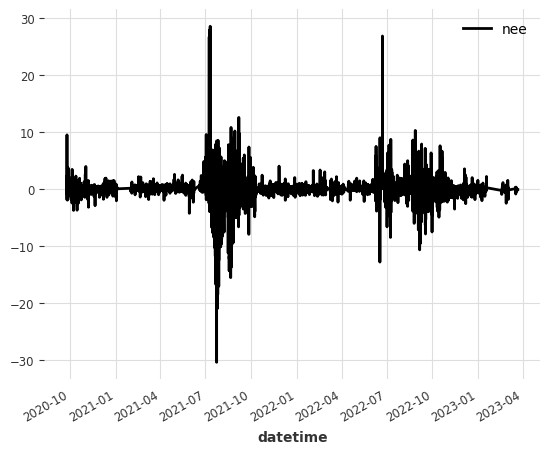

In [68]:
jorn['nee'].plot()

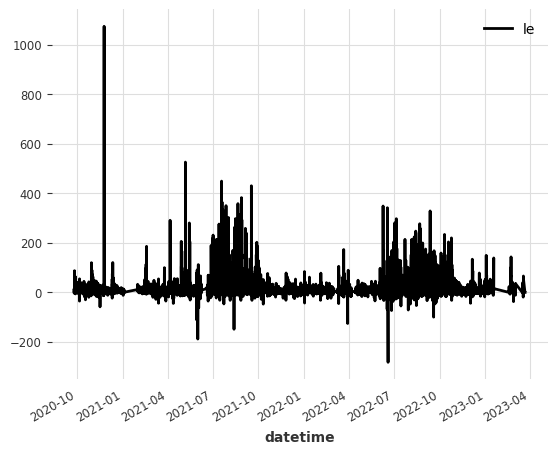

In [69]:
jorn['le'].plot()

#### **CLBJ, Texas**

In [70]:
clbj = quick_neon_series(
    site_id = "CLBJ",
    link = terrestrial_link,
    freq = "min",
    time_col = "datetime",
    day_avg= False,
)

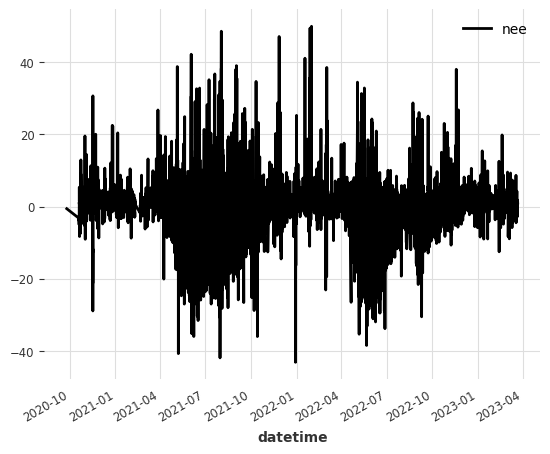

In [71]:
clbj['nee'].plot()

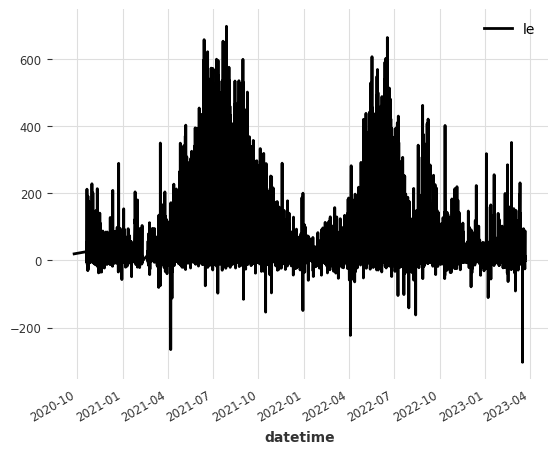

In [72]:
clbj['le'].plot()

#### **PRIN, Texas**

Right next to CLBJ (aquatics). Neither PRIN, nor CLBJ aquatics seem to have data yet.

In [91]:
# # pandas
# data = read_neon(
#     site_id = "PRIN", 
#     time_col = "datetime", 
#     link = terrestrial_link,
# )

# # polars
# data_pl = pl.from_pandas(
#     data
#     .pivot(index = "datetime", columns = "variable", values = "observation")
#     .reset_index()
# )

In [88]:
# data

### **KONZ, Kansas**

Right next to KONA (terrestrial too) and KING (aquatics). Close to UKFS (terrestrial).  
*Note: KING has no data*

In [143]:
konz = quick_neon_series(
    site_id = "KONZ",
    link = terrestrial_link,
    freq = "min",
    time_col = "datetime",
    day_avg= False,
)

In [112]:
# start_ts = pd.Timestamp("2022-12-15")
# end_ts   = pd.Timestamp("2023-01-15")
# konz.slice(start_ts=start_ts, end_ts=end_ts)['le'].plot()

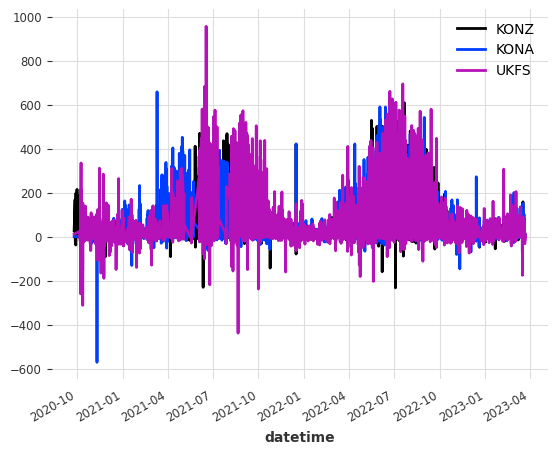

In [124]:
konz['le'].plot(label = "KONZ")
kona['le'].plot(label = "KONA")
ukfs['le'].plot(label = "UKFS", alpha = 0.1)

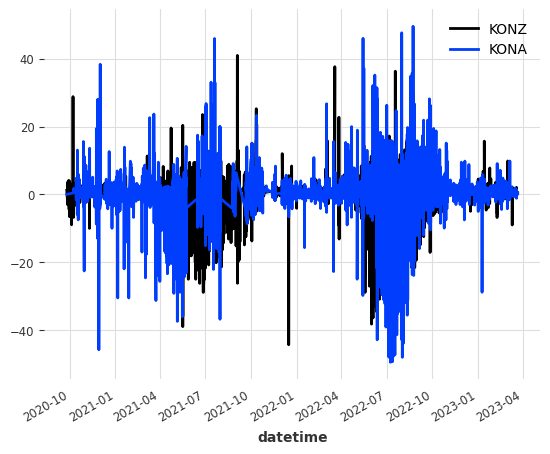

In [128]:
konz['nee'].plot(label = "KONZ")
kona['nee'].plot(label = "KONA", alpha = 0.1)
# ukfs['nee'].plot(label = "UKFS", alpha = 0.1)

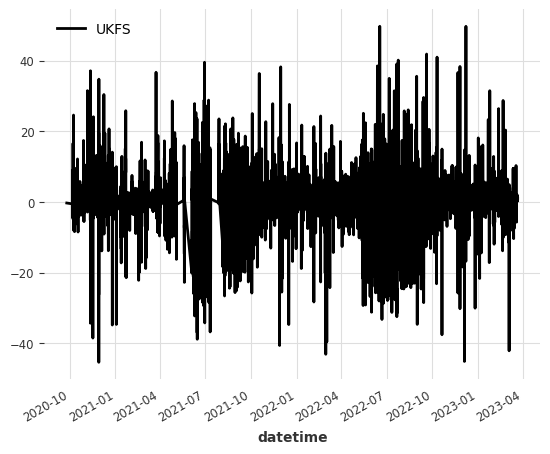

In [129]:
ukfs['nee'].plot(label = "UKFS", alpha = 0.1)

In [114]:
kona = quick_neon_series(
    site_id = "KONA",
    link = terrestrial_link,
    freq = "min",
    time_col = "datetime",
    day_avg= False,
)

In [123]:
ukfs = quick_neon_series(
    site_id = "UKFS",
    link = terrestrial_link,
    freq = "min",
    time_col = "datetime",
    day_avg= False,
)

In [133]:
# NO DATA
# king = quick_neon_series(
#     site_id = "KING",
#     link = aquatic_link,
#     freq = "min",
#     time_col = "datetime",
#     day_avg= False,
# )

#### **TALL, Alabama**

In [134]:
tall = quick_neon_series(
    site_id = "TALL",
    link = terrestrial_link,
    freq = "min",
    time_col = "datetime",
    day_avg= False,
)

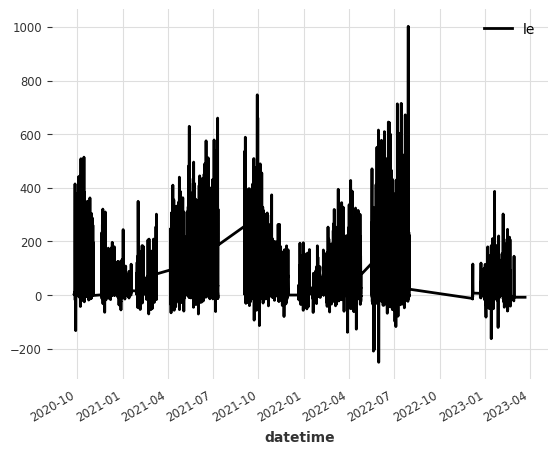

In [136]:
tall['le'].plot()

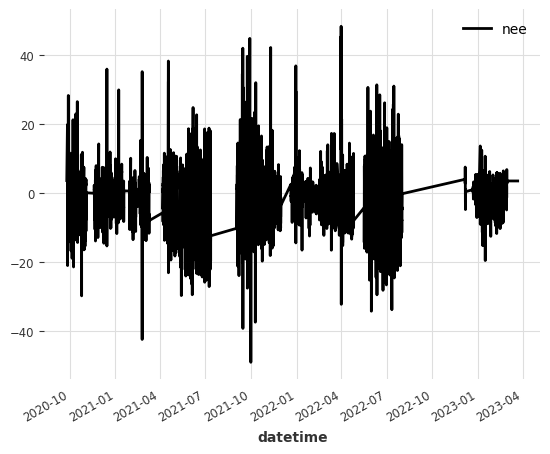

In [135]:
tall['nee'].plot()

#### **ORNL, Tennessee**

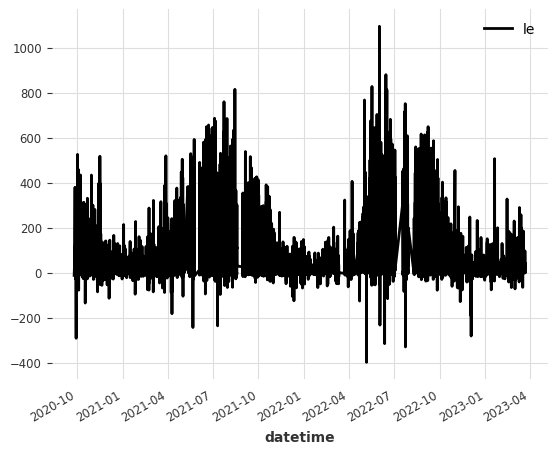

In [137]:
ornl = quick_neon_series(
    site_id = "ORNL",
    link = terrestrial_link,
    freq = "min",
    time_col = "datetime",
    day_avg= False,
)

ornl['le'].plot()

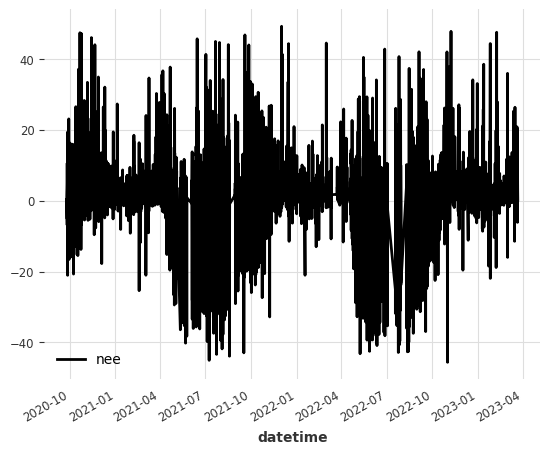

In [138]:
ornl['nee'].plot()

#### **SCBI, Virginia**

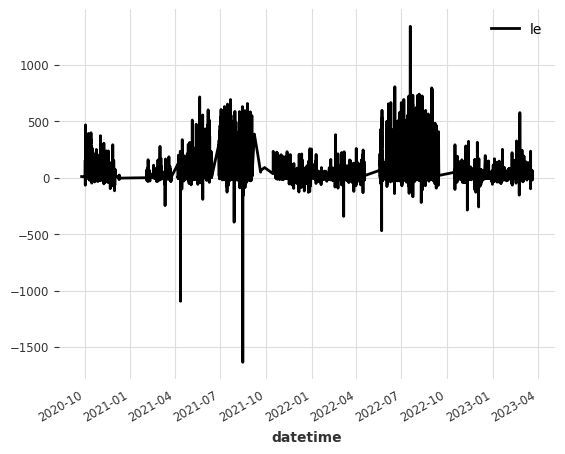

In [139]:
scbi = quick_neon_series(
    site_id = "SCBI",
    link = terrestrial_link,
    freq = "min",
    time_col = "datetime",
    day_avg= False,
)

scbi['le'].plot()

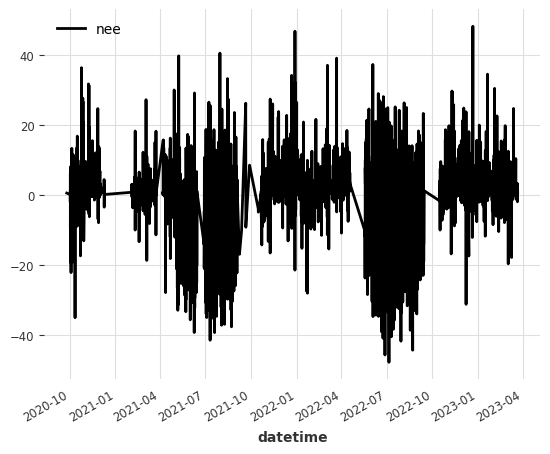

In [140]:
scbi['nee'].plot()

#### **GUAN, Puerto Rico**

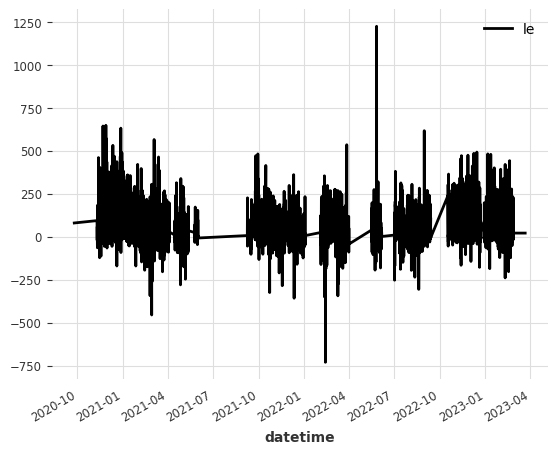

In [141]:
guan = quick_neon_series(
    site_id = "GUAN",
    link = terrestrial_link,
    freq = "min",
    time_col = "datetime",
    day_avg= False,
)

guan['le'].plot()

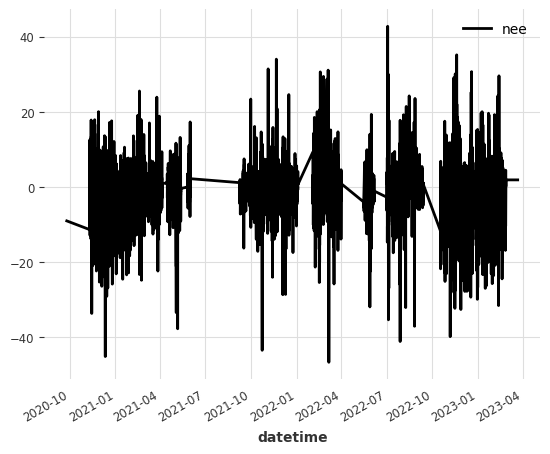

In [142]:
guan['nee'].plot()

# Links

In [4]:
aquatic_link = "https://data.ecoforecast.org/neon4cast-targets/aquatics/aquatics-expanded-observations.csv.gz"
terrestrial_link = "https://data.ecoforecast.org/neon4cast-targets/terrestrial_30min/terrestrial_30min-targets.csv.gz"
tick_link = "https://data.ecoforecast.org/neon4cast-targets/ticks/ticks-targets.csv.gz"
phenology_link = "https://data.ecoforecast.org/neon4cast-targets/phenology/phenology-targets.csv.gz"
beetle_link = "https://data.ecoforecast.org/neon4cast-targets/beetles/beetles-targets.csv.gz"

# Data-processing utility functions

In [15]:
def NOAA_stage3_scan(
    site_id:str = "TREE", 
    variable:str = "TMP"
):
    s3 = fs.S3FileSystem(endpoint_override = "data.ecoforecast.org", anonymous = True)
    path = "neon4cast-drivers/noaa/gefs-v12/stage3/parquet"
    dataset = ds.dataset(path, filesystem=s3)
    return (
        pl.scan_pyarrow_dataset(dataset)
        .filter(pl.col("site_id") == site_id)
        .filter(
          (pl.col("variable") == variable)
        )
        .collect()
        # .pivot(index = "datetime", columns = "variable", values = "prediction")
    )

def day_mean(df, var_to_avg = "TMP", time_col = "datetime", avg_name = "TMP_day_avg"):
    """
    averages values of the column given over the course of a day
    """
    return (
        df
        .with_columns(pl.col(time_col).cast(pl.Date).alias("date"))
        .groupby("date")
        .agg(
            [
                pl.col(var_to_avg).mean().alias(avg_name)
            ]
        )
        .sort("date")
    )

def day_mean_several(df, var_names, time_col = "datetime", avg_name_app = "day_avg"):
    """
    averages values of the column given over the course of a day
    """
    return (
        df
        .with_columns(pl.col(time_col).cast(pl.Date).alias("date"))
        .groupby("date")
        .agg(
            [
                pl.col(var).mean().alias("_".join([var,avg_name_app])) for var in var_names
            ]
        )
        .sort("date")
    )

def pl_to_series(df, time_col = "date", freq = "D"):
    """
    input: polars dataframe
    output: corresponding darts.TimeSeries
    
    for now the easiest thing is to use pandas as a middle-man.
    """
    pd_df = df.to_pandas()
    pd_df[time_col] = pd.to_datetime(pd_df[time_col])
    return (
        TimeSeries.from_dataframe(
            pd_df,
            time_col = time_col,
            freq = freq,
        )
    )

def read_neon(
    site_id, 
    time_col = "datetime", 
    link = "https://data.ecoforecast.org/neon4cast-targets/beetles/beetles-targets.csv.gz",
):
    site_data = pd.read_csv(link)
    site_data[time_col] = pd.to_datetime(site_data["datetime"]).dt.tz_localize(None)
    return (
        site_data
        .loc[site_data["site_id"] == site_id]
    )


def inspect_variables(
    link,
    var_col_names = ["variable"],
):
    site_data = pd.read_csv(link)
    print(f"inspect_variables: FYI, the columns are {site_data.columns}")
    return (
        {
            var: f"{site_data[var].unique()}".replace("\n","") for var in var_col_names
        }
    )

In [82]:
def quick_neon_series(
    site_id,
    link = terrestrial_link,
    freq = "D",
    time_col = "datetime",
    day_avg: bool = False,
    start_date = pd.Timestamp("2020-09-25"),
):
    # pandas
    data = read_neon(
        site_id = site_id, 
        time_col = time_col, 
        link = link,
    )
    
    # polars
    data_pl = pl.from_pandas(
        data
        .pivot(index = time_col, columns = "variable", values = "observation")
        .reset_index()
    )
    
    # optional average
    if day_avg:
        freq = "D" # override user-set frequency
        data_pl = day_mean_several(
            data_pl, 
            data["variable"].unique(), 
            time_col = time_col, 
            avg_name_app = "day_avg",
        )
        time_col = "date"
    
    # darts
    data_series = fill_missing_values(
        pl_to_series(data_pl, time_col = time_col, freq = freq)
    )
    
    # split
    pre, data_series_out = data_series.split_before(start_date)
    
    return data_series_out